In [1]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
train.pivot_table(index=['Sex'], values=['Survived'], aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [87]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
train['Pclass'] = train['Pclass'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


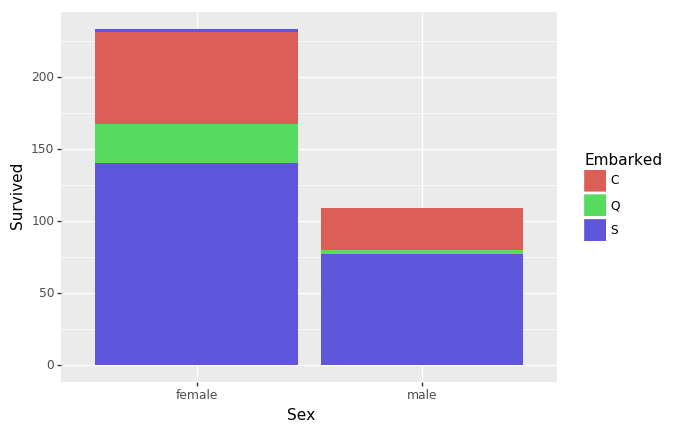

<ggplot: (15118400)>

In [38]:
(ggplot(train)
+ aes(x='Sex', y='Survived', fill='Embarked')
+ geom_col()
)

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


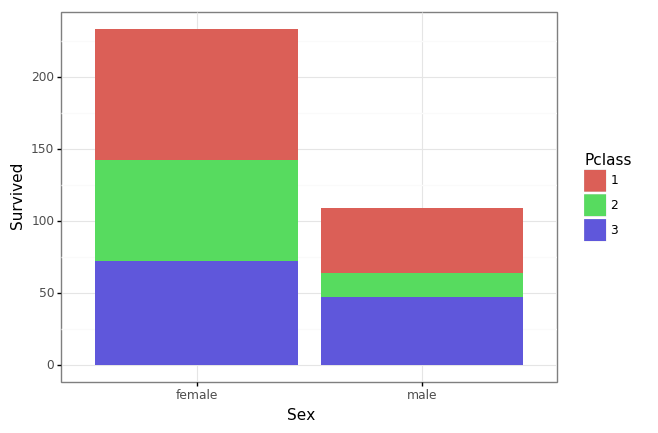

<ggplot: (-9223372036836390519)>

In [60]:
(ggplot(train)
+ aes(x='Sex', y='Survived', fill='Pclass')
+ geom_col()
+ ggtitle('성별과 클래스에 따른 ')
+
+ theme_bw()
)

In [68]:
train['Age'] = train['Age'].dropna()

In [93]:
(ggplot(train)
+ aes(x='Age')
+ geom_point()
)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


PlotnineError: 'geom_point requires the following missing aesthetics: y'

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


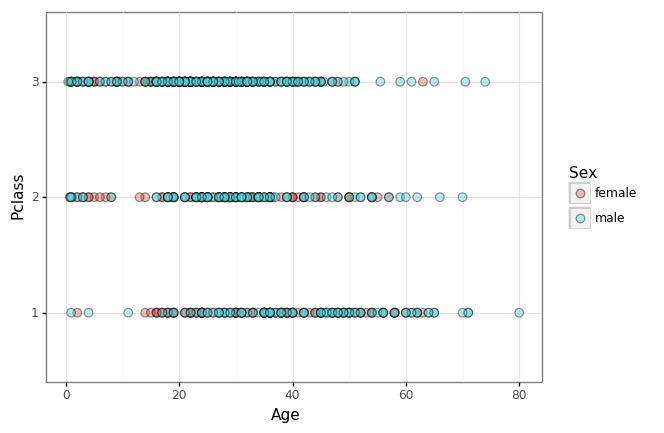

<ggplot: (13364516)>

In [124]:
(ggplot(train)
+ aes(x='Age', y='Pclass', fill='Sex')
+ geom_point(colour='black', size=3, alpha=0.4)
+ theme_bw()
)

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


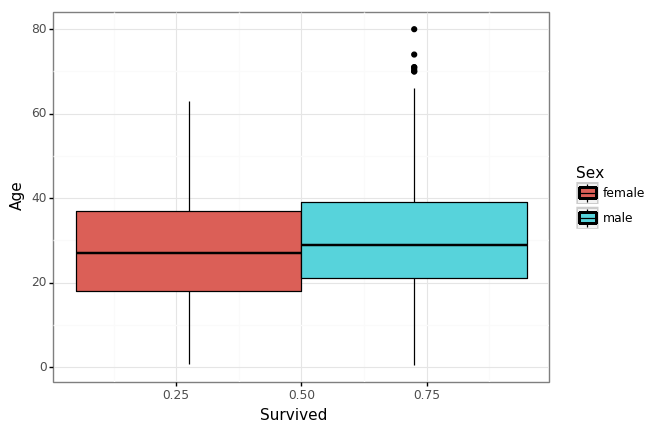

<ggplot: (15122636)>

In [107]:
(ggplot(train)
+ aes(x='Survived', y='Age', fill='Sex')
+ geom_boxplot(colour='black')
+ theme_bw()
)

In [121]:
train['Survived'] = train['Survived'].astype('category')

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


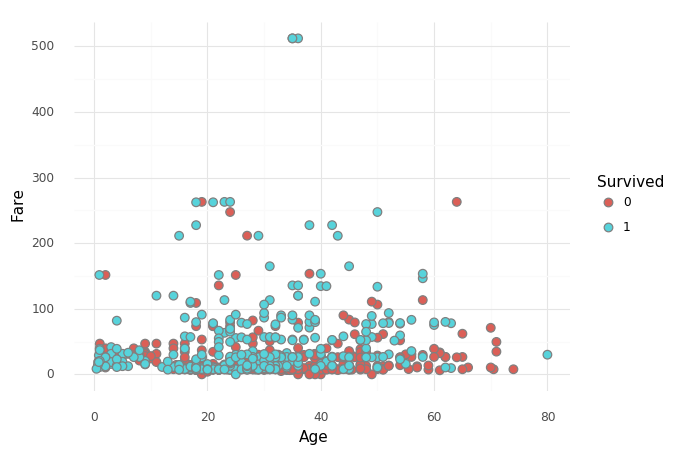

<ggplot: (-9223372036841242417)>

In [122]:
(ggplot(train)
+ aes(x='Age', y='Fare', fill='Survived')
+ geom_point(colour='gray', size=3)
+ theme_minimal()
)

In [167]:
test['Survived']=(test['Sex'] == 'female') | (test['Age'] <= 20) | (test['SibSp'] < 1 & test['Embarked'] == 'S')

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

In [159]:
test['Survived'].value_counts()

True     398
False     20
Name: Survived, dtype: int64

In [160]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [161]:
submission = test[['PassengerId', 'Survived']].copy()

In [162]:
submission.head()

,PassengerId,Survived
0,892,True
1,893,True
2,894,True
3,895,True
4,896,True


In [165]:
submission['Survived'] = submission['Survived'].astype(int)

In [166]:
submission.to_csv('submissions/submission_female_S.csv', index=False)

In [140]:
% ls submissions

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F072-C662

 C:\dataitgirls\prjs\titanic\submissions 디렉터리

2018-08-16  오후 04:19    <DIR>          .
2018-08-16  오후 04:19    <DIR>          ..
2018-08-13  오전 11:58             3,258 submission.csv
2018-08-16  오후 04:22             4,821 submission_female_9.csv
               2개 파일               8,079 바이트
               2개 디렉터리  45,144,338,432 바이트 남음
